In [1]:
from node2vec import Node2Vec
import os
import networkx as nx
import numpy as np
import random

In [2]:
#load genes for making the graph
geneidx = [] 
filea = open("data/gidx.txt")
node_gene = filea.readlines()
for id in node_gene:
    node = id.split()[0]
    geneidx.append(node)

#load diseases ids
doidx = []
filea = open("data/didx.txt")
node_disease = filea.readlines()
for id in node_disease:
    node_1 = id.split()[0]
    doidx.append(node_1)

#load lnRNA ids
# lncidx = []
# with open("data/lncRNA_ids.txt", 'r') as file:
#     node_lncRNA = file.readlines()
#     for id in node_lncRNA:
#         node = id.split()[0]
#         lncidx.append(node)

# #load miRNA
# miidx = []
# with open('data/miRNA_ids.txt', 'r') as file:
#     node_miRNA = file.readlines()
#     for id in node_miRNA:
#         node = id.split()[0]
#         miidx.append(node)

In [5]:
#embedding the 3 graphs: gd, gd, gd
graph_name = 'gda'

gda_graph = nx.read_weighted_edgelist('data/'+graph_name+'.edgelist',delimiter="\t")  
print(gda_graph)

print("Before:",gda_graph.number_of_nodes(),gda_graph.number_of_edges())
for edge in list(gda_graph.edges):
    if gda_graph.get_edge_data(edge[0],edge[1])['weight']<=0.0:
        gda_graph.remove_edge(edge[0],edge[1])
print("After:",gda_graph.number_of_nodes(),gda_graph.number_of_edges())


Graph with 1217 nodes and 217000 edges
Before: 1217 217000
After: 1217 5696


In [11]:
nx.write_graphml(gda_graph, 'data/'+graph_name+'.graphml')

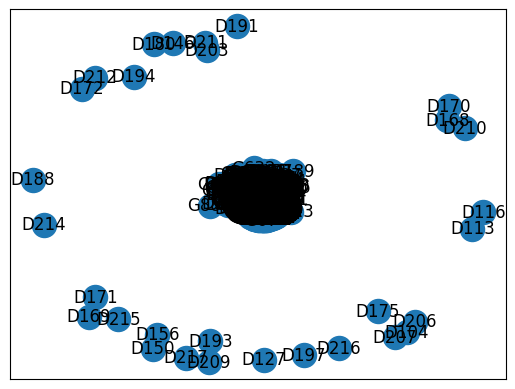

In [10]:
nx.draw_networkx(gda_graph)
# nx.draw_networkx_edges(gda_graph, pos=nx.spring_layout(gda_graph))
# nx.draw_networkx_labels(gda_graph, pos=nx.spring_layout(gda_graph))

In [10]:
nx.write_edgelist(gld_graph, "data/gg_dd_pos_edges.edgelist")

In [6]:
node2vec = Node2Vec(gld_graph, dimensions=64, walk_length=10, num_walks=100, workers=4) 
model = node2vec.fit(window=10, min_count=1, batch_words=4)
print("finished!")

Computing transition probabilities:   0%|          | 0/2031 [00:00<?, ?it/s]

finished!


In [ ]:
from pecanpy import pecanpy
g = pecanpy.PreComp(p=1, q=1, workers = 4)
g.read_edg('data/gg_dd_pos_edges.edgelist', weighted=True, directed=False)
walks = g.simulate_walks(walk_length=10, num_walks=100)
model = Word2Vec(walks, vector_size=64, window=10, min_count=1, sg=1, workers=4, batch_words=4)

In [7]:
filea = open("data/balanced data/gd/X_train.txt")
x_train = filea.readlines()

fileb = open("data/balanced data/gd/y_train.txt")
y_train = fileb.readlines()

filea = open("data/balanced data/gd/X_test.txt")
X_test = filea.readlines()
fileb = open("data/balanced data/gd/y_test.txt")
y_test = fileb.readlines()

# train set
train = []
for i in range(len(x_train)):
        tup1 = (x_train[i].split()[0].split(",")[0],) #G123
        tup2 = (x_train[i].split()[0].split(",")[1],) #D123
        tup3 = (y_train[i].split()[0],)               #1/0
        tup4 = tup1 + tup2 + tup3
        # print(tup4)
        train.append(tup4)

# test set      
test = []
for i in range(len(X_test)):
        tup1 = (X_test[i].split()[0].split(",")[0],)
        tup2 = (X_test[i].split()[0].split(",")[1],)
        tup3 = (y_test[i].split()[0],)
        tup4 = tup1 + tup2 + tup3
        test.append(tup4) 

In [8]:
#word vectors learnt by node2vec, according to the graph
gd_g_vec={} 
for gid in geneidx:
    gd_g_vec[gid]=model.wv.get_vector(gid)  
    
gd_d_vec={}                 
for dis in doidx:
    gd_d_vec[dis]=model.wv.get_vector(dis)  

# gd_l_vec={}
# for lnc in lncidx:
#     gd_l_vec[lnc] = model.wv.get_vector(lnc)

# gd_m_vec = {}
# for mi in miidx:
#     gd_m_vec[mi] = model.wv.get_vector(mi)

In [15]:
train[1]

('G257', 'D14', '1')

In [16]:
gd_g_vec={} 
for gid in geneidx:
    gd_g_vec[gid]=model.wv.get_vector(gid)  
print("disease vector obtained........")

gd_d_vec={}                 
for dis in doidx:
    gd_d_vec[dis]=model.wv.get_vector(dis)  


X_train_gld =[]          
for gd in train:                    
    gd_vec = np.concatenate((gd_g_vec[gd[0]],gd_d_vec[gd[1]])) 
    X_train_gld.append(gd_vec)
        
X_train_gld = np.array(X_train_gld)
    
X_test_gld =[]
for gd in test:
    gd_vec = np.concatenate((gd_g_vec[gd[0]],gd_d_vec[gd[1]]))
    X_test_gld.append(gd_vec)
        
X_test_gld = np.array(X_test_gld) 
print(X_train_gld.shape, X_test_gld.shape)

disease vector obtained........
(9112, 128) (2280, 128)


In [13]:
#for gld network
X_train_gld =[]          
for gld in train:
    if (gld[0].startswith('L')):
        gld_vec = np.concatenate((gd_l_vec[gld[0]], gd_d_vec[gld[1]]))
    elif (gld[0].startswith('G')):
        if (gld[1].startswith('L')):
            gld_vec = np.concatenate((gd_g_vec[gld[0]], gd_l_vec[gld[1]]))
        else:
            gld_vec = np.concatenate((gd_g_vec[gld[0]], gd_d_vec[gld[1]]))
    X_train_gld.append(gld_vec)
        
X_train_gld = np.array(X_train_gld)
print(X_train_gld.shape)

X_test_gld =[]
for gld in test:
    if (gld[0].startswith('L')):
        gld_vec = np.concatenate((gd_l_vec[gld[0]], gd_d_vec[gld[1]]))
    elif (gld[0].startswith('G')):
        if (gld[1].startswith('L')):
            gld_vec = np.concatenate((gd_g_vec[gld[0]], gd_l_vec[gld[1]]))
        else:
            gld_vec = np.concatenate((gd_g_vec[gld[0]], gd_d_vec[gld[1]]))
    X_test_gld.append(gld_vec)

X_test_gld = np.array(X_test_gld) 
print(X_test_gld.shape)

(9081, 128)
(2271, 128)


In [24]:
#for gmd network
X_train_gmd =[]          
for gmd in train:
    if (gmd[0].startswith('M')):
        gmd_vec = np.concatenate((gd_m_vec[gmd[0]], gd_d_vec[gmd[1]]))
    elif (gmd[0].startswith('G')):
        if (gmd[1].startswith('M')):
            gmd_vec = np.concatenate((gd_g_vec[gmd[0]], gd_m_vec[gmd[1]]))
        else:
            gmd_vec = np.concatenate((gd_g_vec[gmd[0]], gd_d_vec[gmd[1]]))
    X_train_gmd.append(gmd_vec)
        
X_train_gmd = np.array(X_train_gmd)
print(X_train_gmd.shape)

X_test_gmd =[]
for gmd in test:
    if (gmd[0].startswith('M')):
        gmd_vec = np.concatenate((gd_m_vec[gmd[0]], gd_d_vec[gmd[1]]))
    elif (gmd[0].startswith('G')):
        if (gmd[1].startswith('M')):
            gmd_vec = np.concatenate((gd_g_vec[gmd[0]], gd_m_vec[gmd[1]]))
        else:
            gmd_vec = np.concatenate((gd_g_vec[gmd[0]], gd_d_vec[gmd[1]]))
    X_test_gmd.append(gmd_vec)

X_test_gmd = np.array(X_test_gmd) 
print(X_test_gmd.shape)

(137337, 128)
(34335, 128)


In [25]:
test, X_test_gmd

([('G605', 'M91', '1'),
  ('G129', 'M277', '1'),
  ('M897', 'D149', '0'),
  ('G468', 'M643', '1'),
  ('M2446', 'D74', '0'),
  ('M716', 'D74', '0'),
  ('M1216', 'D149', '0'),
  ('M1317', 'D30', '0'),
  ('M1705', 'D78', '0'),
  ('M509', 'D187', '0'),
  ('G312', 'M521', '1'),
  ('M649', 'D188', '1'),
  ('M1428', 'D24', '1'),
  ('M2270', 'D36', '0'),
  ('M826', 'D152', '0'),
  ('M644', 'D97', '1'),
  ('M840', 'D192', '0'),
  ('M1963', 'D120', '0'),
  ('M2', 'D10', '1'),
  ('M360', 'D193', '0'),
  ('M2450', 'D124', '0'),
  ('M160', 'D56', '0'),
  ('M1770', 'D84', '0'),
  ('G599', 'M1146', '1'),
  ('M1831', 'D78', '0'),
  ('G612', 'M19', '1'),
  ('G359', 'M205', '1'),
  ('M1357', 'D80', '0'),
  ('G910', 'M1253', '1'),
  ('G389', 'M639', '1'),
  ('G140', 'M903', '1'),
  ('M709', 'D202', '0'),
  ('G291', 'M653', '1'),
  ('G102', 'M1113', '1'),
  ('M23', 'D65', '1'),
  ('M2261', 'D97', '0'),
  ('M1780', 'D194', '0'),
  ('M776', 'D117', '0'),
  ('M1745', 'D151', '0'),
  ('M2150', 'D4', '0'),
  (

In [18]:
np.save('X_train_gld_node2vec.npy',X_train_gld) 
np.save('X_test_gld_node2vec.npy',X_test_gld)

print("save successful!")

save successful!


In [ ]:
#hif1a is gene 1; use the gene name.csv for the gene ids, not the genex.csv